# LDAモデルで遊んでみる

ana_wiki1.ipynbで作った、日本語Wikipediaの記事のLDAモデルをロードして、あんなことやこんなことをしてみる。

1. LDA topic (取得したtopicについて考察)
2. Similarity (input文章と似た記事を探す)
3. Clustering (clusteringして考察)

**注意**  
LDAに使ったデータは（時間節約のため）Wikipediaの全記事の30%なので、実際のWikipediaの記事に存在するが、  
今回のデータには含まれないものがある。

In [ ]:
import gensim
import MeCab
import os
import glob
import pickle
import yaml
%matplotlib inline

In [2]:
# 基本となるデータ、モデルのload
dictionary = gensim.corpora.Dictionary.load_from_text('./jawiki_model/jawiki_wordid_resample_v2.txt')
with open('./jawiki_model/jawiki_tfidf_resample_v2.dump', mode='rb') as f:
     corpus_tfidf = pickle.load(f)
lda = gensim.models.ldamulticore.LdaMulticore.load('./jawiki_model/jawiki_lda_v2.model')

# 1. LDA topic

1. LDAで最適化した、日本語Wikipediaの記事のトピックを見る。  
2. 記事全体のTopoic分布を調査する。

### 1-1. LDAで最適化した、日本語Wikipediaの記事のトピックを見る

In [3]:
# 全topic(100個)に対して、上位10個の重要なwordをshow
lda.show_topics(num_topics=-1, num_words=10)

[(0,
  '0.025*"Pokemon!" + 0.009*"台風" + 0.006*"浅倉大介" + 0.006*"GLAY" + 0.005*"一覧" + 0.004*"GitHub" + 0.004*"藤井フミヤ" + 0.004*"茜新社" + 0.003*"熱帯低気圧" + 0.003*"仮面ライダー"'),
 (1,
  '0.023*"NFL" + 0.016*"ヤード" + 0.008*"アメリカンフットボール" + 0.008*"組織名" + 0.007*"値" + 0.007*"NFC" + 0.006*"TD" + 0.006*"殿堂" + 0.005*"スーパーボウル" + 0.005*"パス"'),
 (2,
  '0.010*"ダム" + 0.005*"毛" + 0.005*"萼" + 0.005*"発電所" + 0.005*"発電" + 0.004*"基部" + 0.004*"花弁" + 0.003*"片" + 0.003*"草本" + 0.003*"堤"'),
 (3,
  '0.021*"属" + 0.017*"科" + 0.011*"種" + 0.010*"分類" + 0.009*"綱" + 0.009*"亜" + 0.008*"植物" + 0.008*"目" + 0.008*"学名" + 0.006*"分布"'),
 (4,
  '0.007*"TVドラマ" + 0.005*"役" + 0.004*"東映" + 0.003*"TBS" + 0.003*"刑事" + 0.003*"女" + 0.003*"東宝" + 0.003*"演" + 0.002*"松竹" + 0.002*"NTV"'),
 (5,
  '0.017*"恒星" + 0.014*"星" + 0.012*"料理" + 0.009*"NGC" + 0.007*"天体" + 0.006*"光年" + 0.006*"変光星" + 0.005*"HD" + 0.005*"視る" + 0.005*"食べる"'),
 (6,
  '0.007*"作曲家" + 0.007*"演奏" + 0.006*"ピアノ" + 0.006*"指揮者" + 0.005*"語" + 0.005*"ドイツ" + 0.005*"音楽" + 0.005*"楽章" + 0.005*"ヴァイオリン"

#### a. きれいにtopic内容が固まっている例

- 3: '0.021*"属" + 0.017*"科" + 0.011*"種" + 0.010*"分類" + 0.009*"綱" + 0.009*"亜" + 0.008*"植物" + 0.008*"目" + 0.008*"学名" + 0.006*"分布"'
- 6: '0.007*"作曲家" + 0.007*"演奏" + 0.006*"ピアノ" + 0.006*"指揮者" + 0.005*"語" + 0.005*"ドイツ" + 0.005*"音楽" + 0.005*"楽章" + 0.005*"ヴァイオリン" + 0.005*"指揮"'
- 42: '0.042*"駅" + 0.012*"線" + 0.007*"ホーム" + 0.007*"開業" + 0.007*"路線" + 0.005*"間" + 0.005*"運行" + 0.005*"列車" + 0.005*"駅名" + 0.005*"鉄道"'
- 81: '0.023*"古墳" + 0.012*"出土" + 0.011*"遺跡" + 0.008*"史跡" + 0.008*"メートル" + 0.008*"墳" + 0.007*"墳丘" + 0.006*"築造" + 0.005*"土器" + 0.005*"発掘調査"'

#### b. 微妙な例

- 5: '0.017*"恒星" + 0.014*"星" + 0.012*"料理" + 0.009*"NGC" + 0.007*"天体" + 0.006*"光年" + 0.006*"変光星" + 0.005*"HD" + 0.005*"視る" + 0.005*"食べる"'
- 50: '0.006*"ウォルト・ディズニー" + 0.005*"リーグ・アン" + 0.005*"ミニマム級" + 0.005*"流通経済大学" + 0.005*"ドナルド" + 0.004*"ガーナ" + 0.004*"ブータン" + 0.004*"世界選手権自転車競技大会トラックレース" + 0.004*"桃園" + 0.004*"矢沢永吉"'

### コメント
aのトピックは上から、3:種族系, 6:クラシック音楽系, 42:電車系, 81:考古学系、ときれいにまとまっている。一方でbの例では、5:宇宙と料理, 50:特にまとまりがない、となっている。微妙な例では、トピック5は宇宙や料理系の記事数が少ないため限られたトピック数（100個）を節約するためにmergeされたのだろうか？トピック50は「その他」枠かもしれない：あまり記事数がない系のテーマが集まったのかもしれない。

### 1-2. 記事全体のTopoic分布の調査

In [4]:
# 0-99までのトピックの重みを、全記事に対してsumしてplot
from collections import defaultdict

num_topics = len(lda.show_topics(num_topics=-1))
data = np.zeros(num_topics)
for v in lda[corpus_tfidf]:
    v = np.asarray(v)
    data[list(v[:, 0])] += v[:, 1]

<Container object of 100 artists>

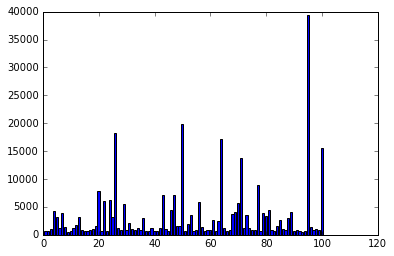

In [5]:
%matplotlib inline
plt.bar(0.5 + np.arange(num_topics), data)

#### 重みが大きい順にtopic番号をshow

In [19]:
topics = data.argsort()[::-1]
print(topics)

[94 49 25 63 99 70 76 19 46 42 23 21 55 69 28 45 80  3 88 68 78  6 67 72 52
 79 12 24  4 35 87 60 84 62 30 51 11 83 18 47 48 95  7 56 10 64 26 71 33  5
 41 38 73  2 31 17 97 43 85 75 29 34 81 74 59 13 54 58 90 32 66 98 86 16 27
 96 82 15 89 44 93 37 20 77  1  0  9 14 65 40 57 53 61 91 39 22 36 50  8 92]


#### Top6のtopicをshow

In [22]:
for topic in topics[:6]:
    print('%d: %s' % (topic, lda.print_topic(topic, 7)))

94: 0.001*"声" + 0.001*"の" + 0.001*"よう" + 0.001*"しまう" + 0.001*"中" + 0.001*"たち" + 0.001*"登場"
49: 0.003*"できる" + 0.003*"場合" + 0.002*"的" + 0.002*"もの" + 0.002*"よう" + 0.002*"使用" + 0.002*"使う"
25: 0.009*"放送" + 0.007*"番組" + 0.005*"2016年" + 0.004*"出演" + 0.004*"役" + 0.004*"2015年" + 0.003*"2014年"
63: 0.004*"教授" + 0.004*"研究" + 0.003*"大学" + 0.003*"大学院" + 0.002*"卒業" + 0.002*"共著" + 0.002*"著書"
99: 0.003*"彼" + 0.003*"De" + 0.003*"フランス" + 0.002*"EN" + 0.002*"イギリス" + 0.002*"軍" + 0.002*"the"
70: 0.010*"作曲" + 0.010*"作詞" + 0.010*"アルバム" + 0.009*"ALBUM" + 0.008*"編曲" + 0.008*"シングル" + 0.006*"曲"


#### Worst6のtopicをshow

In [23]:
for topic in topics[::-1][:6]:
    print('%d: %s' % (topic, lda.print_topic(topic, 7)))

92: 0.007*"ロアッソ熊本" + 0.007*"湘南ベルマーレ" + 0.006*"愛媛FC" + 0.005*"歌川" + 0.005*"FC町田ゼルビア" + 0.005*"カターレ富山" + 0.005*"水戸ホーリーホック"
8: 0.004*"Kenya" + 0.004*"Elements" + 0.003*"BENI" + 0.003*"韓国代表" + 0.003*"EDINET" + 0.003*"HiGH&LOW" + 0.003*"アスカ"
50: 0.006*"ウォルト・ディズニー" + 0.005*"リーグ・アン" + 0.005*"ミニマム級" + 0.005*"流通経済大学" + 0.005*"ドナルド" + 0.004*"ガーナ" + 0.004*"ブータン"
36: 0.006*"マラーター王国" + 0.005*"マラーター" + 0.005*"復旦大学" + 0.004*"Mozilla" + 0.003*"Lig" + 0.003*"Firefox" + 0.003*"神名帳"
22: 0.008*"徳島県" + 0.005*"Wikipedia" + 0.005*"美馬市" + 0.004*"舞鶴市" + 0.004*"舞鶴" + 0.004*"海部" + 0.003*"ゆず"
39: 0.007*"参事官" + 0.005*"カラブリア州" + 0.005*"大臣官房" + 0.005*"釜山" + 0.005*"Cal" + 0.005*"審議官" + 0.004*"釜山広域市"


### コメント
図から上位6トピックくらいは、非常に高い比率で存在することがわかる。Top6を調べてみた結果、トピック94, 49, 99の抽象的な単語系と、テレビ、音楽という記事の多そうなトピック系に大別できた。前者の抽象系は分野に関わらず使われていると考えられるので納得感がある。

下位6トピックを見ると、Worst1位はサッカーJ2(3?)という何ともニッチな感じのトピック、トピック36のマラータ(https://ja.wikipedia.org/wiki/マラーター) はインドの民族らしい。。ってそんなの初めて知ったわ！まー、どの単語も記事数が少ないのは納得感はある。なぜその軸をLDAが選んだのか、という疑問は残るが。

# 2. Simirality

LDAで圧縮したWikipediaの記事情報に対して、記事間の類似度を計算し考察する。

1. いくつかのWikiの記事をinputにして、(1)近い記事と(2)その記事のトピック分布を取得し、妥当性をチェックする。
2. 任意の文章をinputにして、1と同様のチェックを行う。

### 2-1. Wiki記事を使った、LDAモデルの妥当性チェック

In [ ]:
# document番号から、記事のトピックが参照できるdictionaryの作成
import yaml

doc2article = './jawiki_data/jawiki-latest-pages-articles-resample_docid_v2.txt'
article2topics = glob.glob('./jawiki_data/*topicid_v2.txt')
dic1 = yaml.load(open(doc2article))
dic2 = {}
for article2topic in article2topics:
    #dic2.update(yaml.load(open(article2topic)))
    for line in open(article2topic).readlines():
        vs = line.split(':')
        dic2[vs[0]] = ' '.join(vs[1:]).strip('\n').strip()

dic_doc2topic = {}
for k, v in dic1.items():
    dic_doc2topic[k] = dic2[v]

with open('./jawiki_model/doc2topic_resample_v2.dump', 'wb') as g:
    pickle.dump(dic_doc2topic, g)
    
dic_topic2doc = {v:k for k, v in dic_doc2topic.items()}
with open('./jawiki_model/topic_resample_v2.list', 'w') as g:
    g.write(str(sorted(dic_doc2topic.values())))

In [3]:
# 文章間の距離測定のための準備
index = gensim.similarities.MatrixSimilarity(lda[corpus_tfidf])
index.save('./jawiki_model/jawiki_similarity_resample_v2.index')

In [57]:
with open('./jawiki_model/doc2topic_resample_v2.dump', 'rb') as f:
    dic_doc2topic = pickle.load(f)
dic_topic2doc = {v:k for k, v in dic_doc2topic.items()}
index = gensim.similarities.MatrixSimilarity.load('./jawiki_model/jawiki_similarity_resample_v2.index')

def print_similar_titles(sims, topn=5):
    sims = sorted(enumerate(sims), key=lambda x: -x[1])
    for docnum, sim in sims[:topn]:
        print('%s: %.3f' % (dic_doc2topic[docnum], sim), end=', ')
    print('\n')
    return sims
    
def get_vec(title):
    docnum = dic_topic2doc[title]
    vec_topic = lda[corpus_tfidf[docnum]]
    return vec_topic

### a. titlesにあるWikipediaの記事に近い記事のタイトルを表示

In [82]:
titles = ['ワイン', 'アルコール', 'ドラえもん (キャラクター)', '3年b組金八先生',
          '織田信長', 'テニス', 'アメリカンフットボール', '宇宙', '相対性原理', 'ガリレオ・ガリレイ']
for title in titles:
    vec_topic = get_vec(title)
    sims = index[vec_topic]
    print(title)
    print_similar_titles(sims, 10)

ワイン
ワイン: 1.000, ビオ・ワイン: 0.958, キャットフード: 0.955, 統計品目番号: 0.954, アレキサンドライト: 0.953, 生活保護不正受給: 0.952, クジラの歌: 0.951, 漆: 0.951, ポストハーベスト農薬: 0.950, 豚肉: 0.950, 

アルコール
アルコール: 1.000, 酸素分圧: 0.996, エーテル (化学): 0.995, ネフロン: 0.995, クラウンエーテル: 0.994, 分子マシン: 0.993, ジイソプロピルアミン: 0.993, 遺伝子地図: 0.992, サザンブロッティング: 0.992, フタル酸ビス(2-エチルヘキシル): 0.992, 

ドラえもん (キャラクター)
ドラえもん (キャラクター): 1.000, 夢みる月のルナルティア: 0.998, 少年エスパーねじめ: 0.997, ワーズ・ワース: 0.997, ランジーン×コード: 0.997, 556 (ケロロ軍曹): 0.997, dr.デュオ: 0.997, それがるうるの支配魔術: 0.996, 直流急行型車両一覧: 0.996, 特ダネ三面キャプターズ: 0.996, 

3年b組金八先生
3年b組金八先生: 1.000, ごめんね青春!: 0.995, 悪党 (小説): 0.992, on 異常犯罪捜査官・藤堂比奈子: 0.991, 眠れる森: 0.991, 三波伸介 (初代): 0.991, 闇を斬る!大江戸犯科帳: 0.990, 父母の誤算: 0.990, 共犯者 (2003年のテレビドラマ): 0.990, 九州放送: 0.990, 

織田信長
織田信長: 1.000, 観音寺城の戦い: 0.990, 弘治の内乱: 0.988, 三方ヶ原の戦い: 0.986, 大津城の戦い: 0.986, 越前一向一揆: 0.986, 竹ヶ鼻城の戦い: 0.985, 黒井城の戦い: 0.985, 徳川家康: 0.985, 杉浦玄任: 0.984, 

テニス
テニス: 1.000, フリーテニス: 0.980, スカウティング フォア ボーイズ: 0.976, ビアポン: 0.973, スポーツテスト: 0.972, レスキューロボットコンテスト: 0.969, 男女兼用恋愛ゲーム: 0.967

### b. それぞれの単語のトピック分布を表示（重みの大きい順に並べている）

In [83]:
def print_top_topic(title, topn=5):
    topics = sorted(get_vec(title), key=lambda x: -x[1])[:topn]
    print(topics)

for title in titles:
    print(title)
    print_top_topic(title)
    print()

ワイン
[(49, 0.36727927033954877), (94, 0.13499347927780503), (3, 0.11354147250380303), (41, 0.10641225232712075), (67, 0.075408875444998469)]

アルコール
[(67, 0.3668174226103102), (49, 0.28762791099696122), (28, 0.15757200112455461), (99, 0.041149273921825096), (60, 0.020486538042661907)]

ドラえもん (キャラクター)
[(94, 0.51967324243819979), (49, 0.16828086865720174), (80, 0.15709870499058279), (45, 0.026779938297344683), (70, 0.023258023705645905)]

3年b組金八先生
[(94, 0.49895032383813509), (25, 0.16800797133219891), (4, 0.11813133043662591), (46, 0.058317347318482975), (70, 0.031802317226026035)]

織田信長
[(87, 0.34604896055389128), (94, 0.2794995726008227), (99, 0.079994781786439415), (52, 0.049482815177317743), (88, 0.046034209229522748)]

テニス
[(49, 0.3900814103298485), (94, 0.24183788642976609), (45, 0.11225387741046187), (34, 0.093221913270812154), (70, 0.028941440215441178)]

アメリカンフットボール
[(49, 0.3365136401333409), (45, 0.21869710141126888), (94, 0.16001014481700954), (55, 0.10759456144420364), (1, 0.05

## コメント

結果aは、選択した記事と似た記事（記事の横の数字は類似度）の表題を表示している。思ったよりいい感じに分けられている。「ワイン」は、他のお酒類が上位に食い込んでくれたら嬉しかったけど、そこまで上手くいっていない。しかし、飲食物という括りではよさそう（全記事の30%しか使っていないため、ビールや日本酒などの記事が存在していない事も要因）。また、ワインの実際の記事を見ると、生産地などの分類などの内容も含まれる。似た記事でも同様な傾向は見られる。トピックモデルが、単純に該当記事の「単語のみ」から類推するのではなく、あくまで記事にあるトピック（〜文脈、意味）に記事情報を圧縮しているという特徴が見えている。同じお酒系でもアルコールとした場合は、化学系の記事が選ばれる。かなりいい感じ。「宇宙」の記事は類似記事も宇宙関連でいい感じなのに対して、「ガリレオ・ガリレイ」は"野蛮", "虐殺"など不穏な記事が並んでます。記事の内容を見てみると、ガリレオの裁判についての記事がけっこうなウェイトを占めています。この部分に反応したみたいです。ガリレオが偉大な科学者というより「それでも地球は回っている」裁判で有名なことまで、この考察でわかりますね。。

結果bは、選択した記事のトピック情報です。「ワイン」を例にとると記事内容は、トピック49: 36.7%, トピック94: 13.5%, トピック3: 11.4%...の成分でできていると（ザックリ言えば）理解できます。1章で考察したように、トピック94, 49, 99は抽象的な単語系で色々な記事に使われている特徴があまりないトピックです。トピック3は"属","科"などの分類系トピックで、ワインの記事内容がワインの分類を詳しくしていることがわかります。これは実際の記事内容とも一致します。「織田信長」は、87がまさに戦国時代トピックなのでドンピシャです。似たトピックの記事数が多く、記事内容が特徴的なため、このようにきれいなトピックが作れたのだと思います。「宇宙」は上位4つが全て抽象的な単語系のように見え、5番目が宇宙系トピックです。科学的な記述なので、抽象的な記述が多く、その中に宇宙系の単語が散りばめられているのではないか？と推測できます。

### 2-2. 任意の文章をinputにして、類似度をチェック

下記a, b, cの3種類の文章をinputデータとして、その文章に近いとLDAが判定したWikipediaの類似記事を表示。

In [71]:
def ja_tokenize(text):
    mecab = MeCab.Tagger("-Ochasen -d /opt/local/lib/mecab/dic/mecab-ipadic-neologd")
    mecab.parse('')
    lines = text.split('\n')
    results = []
    for s in lines:
        node = mecab.parseToNode(s)
        while node:
            features = node.feature.split(',')
            if features[0] != 'BOS/EOS':
                w = features[-3]  # word_base
                p = features[0]  # part of speech
                if p in ['名詞', '形容詞', '動詞']:
                    results.append(w)
            node = node.next
        results.append('\n')
    return results

corpus = gensim.corpora.MmCorpus('./jawiki_model/jawiki_bow_resample_v2.mm')
tfidf = gensim.models.TfidfModel(corpus)

In [108]:
def print_similar_titles_text(text, topn=5):
    s = ja_tokenize(text)
    s_bow = dictionary.doc2bow(s)
    s_tfidf = tfidf[s_bow]

    vec_topic = lda[s_tfidf]
    sims = index[vec_topic]
    sims = print_similar_titles(sims, topn)
    print(sorted(vec_topic, key=lambda x: -x[1])[:5])
    return sims

### a. GMO次世代システム研究室の自分のブログの記事をinput

In [123]:
text =\
"""
こんにちは。次世代システム研究室のJK (男)です。
突然ですが書籍の「ゼロから作るDeep Learning」読みましたか？基礎からクリアに説明されていて、個人的にはとても面白かったです。これまでLSTM, 強化学習の記事を書いてきましたが、今回はこの本にならってDeep Learningの基礎の「ちょい深」理解を目指し、Deep Learningの可視化に焦点をあてたいと思います。

ちなみに今回の内容のcodeは、ここに上げておきました。

 
0. 可視化のモチベーション

最近のDeep Learningのフレームワークは充実していて、簡単に動かせるようになりましたね。でも動かせたけど理解した気がしない、って人も多いのではないでしょうか？その理由の一つが、Deep Learningがブラックボックス化していることだと思います。簡単に動かせることの副作用だと思いますが、インプットデータと教師データを入れれば「学習してくる」ので、中身をあまり理解しなくても形にはなっちゃうんですよね。

「可視化」することによって、実際に中で何がおきているのかを少しでも理解しよう！というのが今回の目的です。今回は人気フレームワークKerasを使って可視化を行います。Kerasは、Tensorflow/Theanoをバックエンドにしたラッパーライブラリで直観的な操作が可能です。既存のフレームワークを使うことで、誰でも手軽に試せるだけでなく、実務レベルでも今回の内容を応用できるんではないかと思ってます。

今回の記事の目次
　1. CNN　(= 画像認識Deep Learning)のフィルターと中間データの可視化
　2. MLP　(= 普通?のDeep Learning)のパラメータの可視化と、正則化の可視化
　3. MLPのパラメータの可視化と、Dropoutの可視化
　4. パラメータの初期分布の違いによる、MLPのパラメータ分布の可視化

 
1. CNNのフィルターと中間データの可視化

CNNはDeep Learningの花形である画像認識で使われる手法の基礎です。簡単にいえば、インプット画像と「正解ラベル」のデータセットをCNNに学習させることで、別の画像を見せた時にCNNがもっともらしいラベルを答えてくれるという手法です（詳細は書籍やWebでお願いします）。Deep Learningの”Hello world!”ともいえる、MNIST dataの場合で説明すると、
手書きの数字の画像と、その数字の「正解ラベル」(0–9のいずれか)のデータセット（MNISTデータ）がある。
このインプット x 正解のデータをモデルに学習させる。
別の手書き数字の画像を見せて（インプットし）、学習したモデルがその数字が0-9のいずれであるかを予想する。
という流れです。ここでは「可視化」という手法で、2でさらっと書いた「モデルの学習」部分の理解を深めようと思います。

データはMNISTを使います。まずKerasでCNNをモデル化します。今回は簡単に、Convolution層, Max pooling層, フルコネクト層、それぞれ一層ずつです。Kerasで書くと下のようになります。

青ラベルが実際の数字で、赤ラベルが間違えて予測した数字です。
人が見ても間違えてしまいそうなペアも少しありますが、人なら間違わないペアの方が多いように見えますね。特に0, 6, 8, 9の「円（丸?）」が数字に含まれている数字は、人なら絶対にしないような間違いが多いように感じます。円状の一部が欠けているものを円と判断しなかったり、逆に円でないのに一部の突起のような部分のみで円であると判断したりします。

上記の考察から、CNNのフィルターが「円」を認識する能力が乏しいのでは？と推測できますね。では実際にフィルターを可視化しましょう（やっと「可視化」までたどり着きました。。。）。Kerasだと学習済みの”model”に対して以下のようにすれば、学習済みパラメータ（=重み）を簡単に取得できます。

赤が高く、青が低いので、ざっくりといえば赤部分がフィルターの形状です。フィルターの役割は読んで字のごとく、インプット画像の特徴をフィルターの形状に合わせて抜き出します。こうして16のフィルターを見ると、縦、横、斜め、L字の形状など直線構造はあるものの「円」状のものはないですね。円の形状は、直線状のフィルターを組み合わせて判断していると考えられます。そのため今回のCNNでは（前述したような）「円」そのものでなく、その一部の形を見て判断したような間違いが多いのだと推測されます。

この推測を確認するため、今度は中間イメージ（フィルター直後のデータ）を見てみましょう。Kerasでこれを行うために、少しトリックを使います。下記のように、学習済みmodelから必要なlayer（欲しい中間データが出力される層）まで抜き出し、新しいmodelに使います。このモデル自体はアウトプット層まで構築していないので学習には使えませんが、アウトプットとして欲しい中間データを出力してくれます。

予想通り、中間イメージは16のfilterの特性に合わせてそれぞれ縦、横、斜めにfilteringされており（フィルターの形状と比較してみてください）、「円」状の中間イメージはないです。縦、横、斜めに断片化されたイメージを組み合わせて「円」と認識していると考えられます。上図の正しく認識されている場合はわかりやすく、人がこの16枚のイメージから判断しても「0」と推測できます。

面白いのは間違っている場合で、1番目の例では明らかに0なのに8と間違えています。おそらく（特に左の）縦線が曲線でなく真っ直ぐ引かれているため、0と認識されなかったと思われます（正解の場合に比べ「斜めfilter」への反応が顕著でない）。だからといって、8には間違えないだろうと思いますが、今回のCNNだと8を正しく推測するのが難しそうです（下図の8の正解データ参照）。人は8を「円が2つ」と認識していると思いますが、このCNNではそのように認識していない。人なら最も注目するであろう、8の中心の結び目(‘X’)部分があまり強調されていない＝そのようなfilterがないんです。これが0と8を間違う原因だと考えられます。

2番目の間違いの例も面白いです。間違いの原因は左の線が途中で切れていることだと推測できますが、人であれば簡単に線を「補完」して0とみなせます。こういう補完に関してはCNNもMax poolingで対応していると思いますが、この数字に関してはMax poolingで対応できる範囲を超えて離れてしまったのでしょう。

（推測ですが）人は直線だけでなく円の大きさなども、イメージに合わせてスケールして認識します。これはCNNでいえばfilter sizeをイメージに合わせて、大きくしたり小さくしたり適宜合わせていることに相当する（はず）。同じように、線が離れすぎていてもイメージごとに柔軟に補完の大きさを変更することもできます。なので、人から見ると上記のようなCNNの間違いを不思議に思います。

今回の単純なCNNではconvolution/Max poolingのfilterの大きさは固定化されています。このような制約の中では、どのようなイメージにでも汎用的に使えるfilterは直線だけだと考えられます（もっとfilter数を多くしたり、filter sizeを大きくすれば円も現れるかもしれない）。実際、円といっても8の円と0の円では大きさが異なるし、書いた人によっても大きさも形状も異なる。固定化されたfilterでは、人のように柔軟に形を検出するのが難しそうだな、というのは直観的にも納得できますね。

と考えると、むしろこんな単純なモデルで99%の正解率がであることが驚異的に感じます。ただ忘れてはいけないのは、インプットされている数字は人によって事前にtrimingされたりリスケールされたりしていることです。つまりCNNが苦手とする柔軟にスケールする能力がなくても（できるだけ）大丈夫なように、イメージのサイズや場所ができるだけ「固定化」されているんですね。というわけで、フィルターされたイメージを見ることで、インプットイメージの前処理の大事さについてまで理解が深まりました（たぶん）。

ここの”viz_cnn.ipynb”の最後のセルに、0-9までの数字について同様の比較を載せておきました。間違えても仕方がないというものから、上記の考察が当てはまる間違い、よくわからない間違いなど色々あります。眺めていると他の法則などもわかるかもしれません。
"""

sims = print_similar_titles_text(text, 10)
dic_sims = dict(sims)
print('\nSimilarity to the Wikipedia article')
print(dic_sims[dic_topic2doc['機械学習']])

任意性: 0.999, 概念: 0.999, クリック (ノイズ): 0.999, ウソスコア: 0.999, スーパーfxチップ: 0.999, マインスイーパ: 0.999, パターン: 0.999, 補助便座: 0.999, サポートオンライン: 0.999, シュナプセン: 0.999, 

[(49, 0.73735012742683048), (94, 0.1146272557045188), (70, 0.030852792969461678), (6, 0.020200732224231906), (28, 0.0082114517422947134)]

Similarity to the Wikipedia article
0.945652


### b. たった1単語、有名人の名前（明石家さんま）をinput

In [97]:
text = "明石家さんま"
print_similar_titles_text(text)

新やじうまワイド: 1.000, ibcテレビ: 1.000, newsjapan: 1.000, ez!tv: 1.000, 山本厚太郎: 1.000, 脇田寧人: 1.000, 土曜サスペンス劇場(kry): 1.000, 菊正宗: 1.000, girls' record: 1.000, オーヴァーキル: 1.000, 

[(85, 0.50499999999996836), (94, 0.0050000000000314897), (0, 0.0049999999999999992), (1, 0.0049999999999999992), (2, 0.0049999999999999992)]


### c. ニコニコ大百科の「明石家さんま」の項目をinput

**ただし「明石家さんま」と記述のある行は削除**

In [121]:
text =\
"""
概要
ビートたけし・タモリと並ぶ、お笑いBIG3の一角。

同じよしもとクリエイティブ・エージェンシー所属の後輩芸人である岡村隆史（ナインティナイン）より「お笑い怪獣」という称号で呼ばれるほど、そのトーク力と存在感は他を圧倒する実力を持っている。
どんなゲストのトークでも無理矢理自分をアピールするような展開に持って行き、最終的には自分が最もおいしい話のオチにしてしまうという脅威のスキルを持っており、先輩芸人からも後輩芸人からも恐れられている。

俳優としても活躍しており、代表作は多数。
前妻である女優の大竹しのぶとは「男女7人夏物語」「男女7人秋物語」で主役として共演した際に交際をし、結婚に至った。 

経歴
1955年、和歌山県牟婁郡古座町（現：串本町）生まれ。奈良県奈良市出身。本名、杉本高文。実家ではさんまなど冷凍海産物の加工業を営んでおり、それがきっかけで『さんま』という芸名をつけられた。

芸名から分かるように、元々は落語家として笑福亭松之助一門に入門したものの、『落語のできない落語家』として主に形態模写などのモノマネや漫談を若手時代に行っていた(春風亭小朝曰く「不思議なことに、あんなに喋れるのに落語は壊滅的に下手だった」とのこと)。

毎日放送とは古くからの付き合いがあり70年代から『MBSヤングタウン』、『ヤング OH　オー』にレギュラー出演し、前者については2012年現在も土曜日に放送されている。また月曜深夜の『痛快!　明石家電視台』も25年以上続いているテレビ番組で、この番組の収録のために2週間に1回大阪に帰ってきている。

1981年放送開始の「オレたちひょうきん族」（フジテレビ）が彼の運命を変える。
メインコントの「THE タケちゃんマン」で当初高田純次が演じたライバル・ブラックデビルだったが、高田の急病により代役を立てることとなり、高田の体型に合わせて作られた衣装を着れたのがさんまだけであったため、ブラックデビルを演じることとなった。しかし、当初代役だったさんまがブラックデビルのアイディアを積極的にスタッフに提案したことやコーナーが人気沸騰したため正式に2代目となる。それにより一気に注目されることとなる。

フリートークにおいて相手のトークを食ってしまうほどの強烈な話術と自己アピール術でも注目され、「笑っていいとも！」（フジテレビ）の金曜レギュラーとしてMCのタモリとのフリートークコーナーが人気を博す。

有力株として注目された頃、ちょうどそれまで『お笑いBIG3』としてビートたけし、タモリとともに評されていた萩本欽一が人気低迷。しばらくして自主休業をしてレギュラー全番組を降板した隙に、たけし、タモリと共演し対等以上の実力を見せていたさんまがBIG3入り。毎年正月に放送されていた「BIG3・世紀のゴルフマッチ」（フジテレビ）や「FNSの日 テレビ夢列島（現在の27時間テレビ）」（フジテレビ）における活躍でその地位を確固たる物とし、以降日本が誇る「お笑い怪獣」として今でも業界の第一線に立ち続けている。

一方、俳優としても「男女7人夏物語」「男女7人秋物語」（共にTBSテレビ）で主役を演じ大ヒットさせる。そこで共演した女優の大竹しのぶと1987年に結婚。一女を設ける（現在、IMALUの芸名でモデル、タレントとして活躍中）。

「ひょうきん族」年代から1989年に年代から年代にかけて送終了、大竹しのぶとも1992年に離婚するなど一時的に低迷したものの、「さんまのからくりTV」（TBSテレビ）の成功で再び軌道に乗り始め、「踊る！さんま御殿」「恋のから騒ぎ」（共に日本テレビ）で『さんま対複数人』という脅威のフリートークバトル番組を成功させ、大御所として君臨するようになる。番組での様子から、次第に彼は「お笑い怪獣」と呼ばれることにとなる。

「さんまファミリー」と呼ばれる、彼とつながりの深い芸人やタレントが多い。
村上ショージ、Mr.オクレ、ジミー大西、中村玉緒、浅田美代子などが含まれる。

2008年度に司会を務めたＦＮＳ27時間テレビ「みんな笑顔のひょうきん夢列島」は非常に高い評価を受け様々な芸能人に絶賛された。 また2012年7月に桂三枝が7代目桂文枝の襲名披露をなんばグランド花月で行い、このときにはさんまと三枝の共演を40年ぶりに果たしている。

寝ない事で有名(極度のショートスリーパー)であり、「寝顔を見ると口止め料として金一封が貰える」「本当はロボットなんじゃないか」「いつ何刻電話しても出て、あのテンションで喋る」「30時間近く一緒に居たが全く寝ていない」「ジミー大西がさんまの家に住まわせてもらった際、丸2日間全く寝かせてもらうことができず3日目にとうとう倒れてしまった。さんまはその間一睡もしなかった」等の噂が立っている。一方でひょうきん族時代は寝坊の常習犯だったようで、どうやら人がいない午前中や昼間に寝ているようである(娘のIMARUですら寝顔を見た記憶が無い)。

座右の銘は「生きてるだけで丸儲け」。この格言を縮めて娘の名前を「いまる」にしたという。（後に「IMALU」として芸能界デビュー）

島田紳助との比較
同期の芸人に島田紳助がいる。若手時代は一緒に営業に行ったり、お互いの家で寝泊まりするなど親交は深く、その後ひょうきん族で共演し、90年代から10年代にかけて冠番組を多く持つなど共にテレビ界のスターとして君臨していた。そんな関係性のある2人であるため、2人を比較する評論がいくつかなされている。

徳光和夫は2人を比較し、『努力のさんま、天才の紳助』と評している。2015年『ジョブチューン』の司会者特集で、「凄いと思った司会者」という話題での発言である。さんまはよく若手の番組をチェックしたり、自分の番組を見返して自分で笑っているというエピソードが語られるが、これは見方を変えれば「常に面白い存在であろうとする努力」ともみられるのである。一方の紳助は、プライベートではギャンブルなどの趣味や、店の経営などの話しかせず、お笑いに関する努力もやる気も見られない。しかしいざ番組収録が始まったら、トークの上手さ、作り話の上手さで爆笑を取る、まさに天才だったと振り返っている。

日本航空JAL123便墜落事故とさんまの関係
1985年8月12日夜、東京発大阪行の日本航空123便が長野県と群馬県の県境に位置する御巣鷹山周辺に墜落する事故が起こった。

さんまは当時、「ひょうきん族」の収録後に大阪でラジオ番組「MBSヤングタウン」（MBSラジオ）の生放送があった関係でこの123便を使用しており、当日も123便に搭乗する予定だった。
しかし、たまたま「ひょうきん族」の収録が早く済んだので1便早く搭乗して大阪に向かいこの事故を免れた。
そして、「ヤングタウン」の生放送ではあまりのショックで言葉を失い、冒頭数分に番組変更の旨を含めて喋ったのみだった。またこれ以来、東京と大阪間の移動には必ず新幹線を利用するようになったという。

また、同便には後にBIG３企画の進行役として共演することとなる逸見政孝も搭乗予定だったが難を逃れており、さんまと逸見が同便に乗っていた場合、その後のお笑いや芸能界の勢力図が大きく異なっていた可能性が高い。
"""

sims = print_similar_titles_text(text, 10)
dic_sims = dict(sims)
print('\nSimilarity to the Wikipedia article')
print(dic_sims[dic_topic2doc['明石家さんま']])

山田じん子: 0.995, 森脇和成: 0.991, はなけろ: 0.990, 光の海 (漫画): 0.990, 心はロンリー気持ちは「…」: 0.990, ジミー大西: 0.988, 鬼瓦権造: 0.988, 桃色ヘヴン!: 0.988, 大好き!五つ子: 0.987, 恋文日和: 0.987, 

[(94, 0.5061498657918595), (25, 0.22081979949548403), (85, 0.090565054511889315), (21, 0.032473734271041999), (80, 0.030779093542370524)]

Similarity
0.916816


## コメント

実験aでは、自分のブログ（http://recruit.gmo.jp/engineer/jisedai/blog/deep-learning-keras/） の1章までをインプットとします。内容は機械学習系。計算された類似記事は、[任意性: 0.999, 概念: 0.999, クリック (ノイズ): 0.999, ウソスコア: 0.999, スーパーfxチップ: 0.999]などです(タイトルの横にある数字が類似度；0から1まで取り得て、1のとき完全一致)。ちょっと微妙な感じです。LDAの辞書にない単語が多く、意味のある単語があまり取得できなかったのかもしれません。類似記事も抽象的な内容に見えます。ちなみに、Wikipediaの「機械学習」の記事との類似度を計算すると0.95で非常に高い数字なので、悪くないのかもしれません。

実験bは、極端にたった一単語（日本で有名人といってパッと思いついた）「明石家さんま」をインプットにしてみました。計算された類似記事はテレビ関係で、たったこれだけの情報でもテレビ系のトピックを引っ張ってこられるのは、さすが明石家さんまといったところです。トピック分布としては、85番が圧倒的な重みを占めています。1章で調査したトピックの成分を見てみると、メディア系なのでいい感じです。

実験cでは、ニコニコ大百科の「明石家さんま」の項目の文章(http://dic.nicovideo.jp/a/明石家さんま) をインプットにしました。計算された類似記事は、（マイナーとはいえ）テレビタレントで、なかなか良い感じです。できれば有名人が来てほしかったですが。上位に（明石家さんまと関係深い）「ジミー大西」がランクインしているので「すごい！」と一瞬嬉しくなりましたが、インプット記事にジミー大西という単語が入っていたのでこのせいのようです。Wikipediaの「明石家さんま」の記事との類似度を計算すると0.92なので、悪くない感じです。

これらの実験から、インプット文章との"類似度"が最も高い記事が最も類似している記事とまではいえないものの、"類似度"はインプット文章と記事群との類似性を評価する上でかなり有用であることがわかりました。

# 3. Clustering

LDAで圧縮したWikipediaの記事情報群をクラスタリングする（= 異なる種類の記事ごとに分類する）。
1. Kmeansでクラスタリング (bestのn_clusterも探索)
2. クラスタリングごとのトピック分布をヒストグラム化（それぞれ異なる特徴が見えるか？）
3. 各クラスタごとの記事の特徴を表示

In [169]:
# small numbers for test
"""
N = 30000 

num_topics = len(lda.show_topics(num_topics=-1))
indices = list(np.random.choice(len(corpus_tfidf), N))

data = []
for i in indices:
    vec = [0.] * num_topics
    for j, v in lda[corpus_tfidf[i]]:
        vec[j] = v
    data.append(vec)
"""

'\nN = 30000 \n\nnum_topics = len(lda.show_topics(num_topics=-1))\nindices = list(np.random.choice(len(corpus_tfidf), N))\n\ndata = []\nfor i in indices:\n    vec = [0.] * num_topics\n    for j, v in lda[corpus_tfidf[i]]:\n        vec[j] = v\n    data.append(vec)\n'

In [29]:
# all data
"""
from scipy.sparse import csr_matrix

vs = list(lda[corpus_tfidf])
num_topics = len(lda.show_topics(num_topics=-1))

row = []
for i, v in enumerate(vs):
    row += [i] * len(v)
    print(i, len(v))
    if i == 2:
        print('OK')
        break
row = np.array(row, dtype=np.int)
coldata = np.concatenate(vs[:i+1])
print('OK2')

data = csr_matrix((coldata[:, 1], (row, coldata[:, 0])), shape=(i+1, num_topics)).toarray()
print(data, data.shape)
"""

### 3-1. Kmeansで記事群をクラスタリング

In [39]:
# all data
vs = lda[corpus_tfidf]
num_topics = len(lda.show_topics(num_topics=-1))

data = []
for v in vs:
    each = [0.] * num_topics
    for i, d in v:
        each[i] = d
    data.append(each)
#     break
with open('./jawiki_model/jawiki_features_resample_v2.dump', 'wb') as g:
    pickle.dump(data, g)

fitting n of 50...
fitting n of 100...
fitting n of 150...
fitting n of 200...
fitting n of 250...
fitting n of 300...
fitting n of 350...
fitting n of 400...


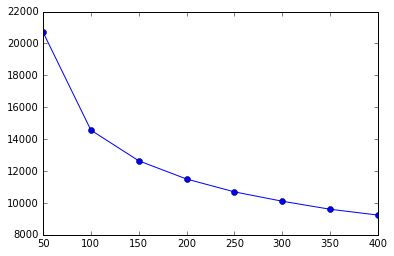

In [41]:
# エルボー法で、適切なn_clusterを探す
from sklearn.cluster import KMeans

ns = list(range(50, 401, 50))
distortions = []
for n in ns:
    print('fitting n of %d...' % n)
    km = KMeans(n_clusters=n, init='k-means++',
                n_init=1, max_iter=300, random_state=0)
    km.fit(data)
    distortions.append(km.inertia_)
    
plt.plot(ns, distortions, 'o-')

In [109]:
# 上記よりn_cluster=200がいい感じのようにみえるので、200を採用
ncluster = 200
km = KMeans(n_clusters=ncluster, init='k-means++',
            n_init=10, max_iter=300, random_state=0)
y_km = km.fit_predict(data)

with open('./jawiki_model/kmeans_resample_v2.model', 'wb') as g:
    pickle.dump(km, g)

In [110]:
dic_cluster = {}
for i in range(ncluster):
    dic_cluster[i] = np.where(y_km == i)[0]

### 3-2. クラスタリングした記事群のトピック分布をクラスタごとにヒストグラム化

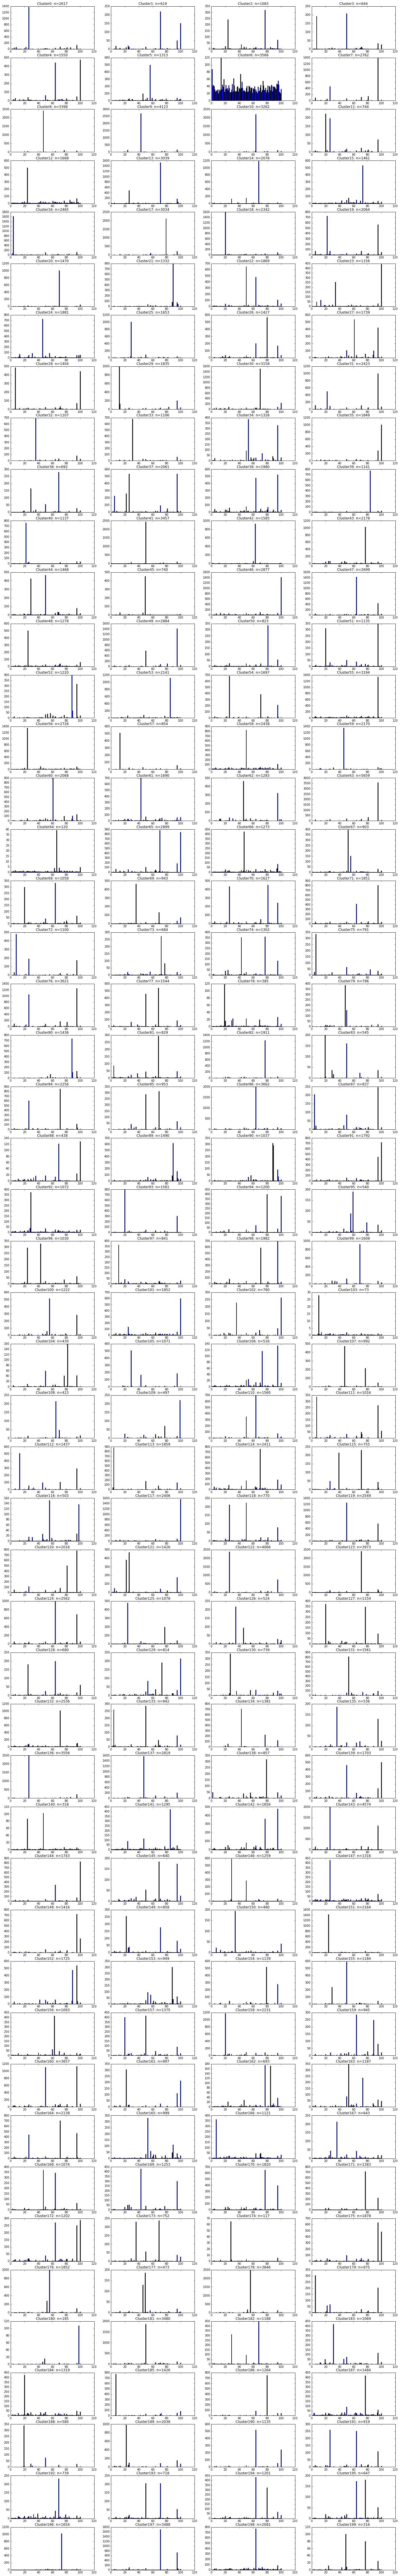

In [124]:
TH_IMPORTANCE = 0.1

fig, axes = plt.subplots(50, 4, figsize=(24, 160))
axes = axes.flatten()

data_array = np.asarray(data)
important_topics = []
data_hist = []
for i in range(ncluster):
    each = data_array[dic_cluster[i]].sum(axis=0)
    sorted_topics = each.argsort()[::-1]
    imp_topics = sorted_topics[each[sorted_topics]/sum(each) > TH_IMPORTANCE]
    data_hist.append(each)
    important_topics.append(imp_topics)
    axes[i].bar(np.arange(num_topics) + 0.5, each)
    axes[i].set_title('Cluster%d: n=%d' % (i, sum(each)))

### 3-3. 各クラスタの代表的な記事を調査

a. 各クラスタ中心に最も近い記事を表示  
b. 各クラスタから10記事をランダムにサンプルし、だいたいの記事の傾向をつかむ

### a. 各クラスタ中心に最も近い記事を表示 

その記事のトピック分布（大きな重みの単語）も表示

In [125]:
from sklearn.metrics import pairwise_distances_argmin_min

closests, _ = pairwise_distances_argmin_min(km.cluster_centers_, data)
for i, closest in enumerate(closests):
    vec_topic = lda[corpus_tfidf[closest]]
    print(i, dic_doc2topic[closest], tuple(important_topics[i]))
    print(sorted(vec_topic, key=lambda x: -x[1])[:4], end='\n\n')

0 弾厚作 (25,)
[(25, 0.50499999999999989), (0, 0.0049999999999999992), (1, 0.0049999999999999992), (2, 0.0049999999999999992)]

1 commons&sense (70, 99)
[(70, 0.32813638901524311), (99, 0.28830732058522429), (80, 0.064402278846240391), (94, 0.054121063233593947)]

2 総合公園 (76, 23)
[(76, 0.31267590240678705), (23, 0.19427131877624446), (94, 0.097897625825446102), (46, 0.05757697449968515)]

3 増二度 (49, 6)
[(49, 0.35740585134490643), (6, 0.2862822186357234), (94, 0.10509995397337031), (99, 0.041498755378058784)]

4 フランス大統領官邸 (99, 63)
[(99, 0.32033402896943153), (63, 0.27295926398305537), (0, 0.0041500684392603354), (1, 0.0041500684392603354)]

5 オスカー・シュミット (55,)
[(55, 0.36218770137215334), (45, 0.14753874355889271), (58, 0.082894027912381818), (24, 0.065148241329806761)]

6 銀鮭 ()
[(0, 0.0099999999999999933), (1, 0.0099999999999999933), (2, 0.0099999999999999933), (3, 0.0099999999999999933)]

7 太鼓持ちの達人〜正しい××のほめ方〜 (94, 25)
[(94, 0.47294535033136176), (25, 0.18456378184326144), (4, 0.05729407205

### b. 各クラスタから10記事をランダムにサンプルし、だいたいの記事の傾向をつかむ

クラスタ番号の横にある数字は、そのクラスタ記事群で大きな重みを持つトピック番号

In [126]:
N_SELECT = 10

np.random.seed(0)
for i in range(ncluster):
    indices = np.random.choice(dic_cluster[i], N_SELECT, replace=False)
    titles = [dic_doc2topic[idx] for idx in indices]
    print('Cluster%d %s: %s' % (i, tuple(important_topics[i]), ','.join(titles)), end='\n\n')

Cluster0 (25,): スペルバウンド,坪田文,佐藤智恵子,富岡志織,平野文子,水沢南紀,鈴木宗太郎,高橋智子,nhk-fm放送,いとうまゆ

Cluster1 (70, 99): その手はないよ,ウィリー・ディクスン,シモーネ・シモンズ,アニー・レノックス,リッキ・リー,フォーチュネイト・サン,no one lives forever,レオ・ブルース,ザ・クラッシュ,カントリー・ミュージック

Cluster2 (76, 23): 栃木県医師会,小平霊園,丸の内 (岡山市),井原あいあいバス,能美市,千葉県の市町村旗一覧,西区 (広島市),最上川グリーンパーク,白川郷,落合

Cluster3 (49, 6): ヴィオラ・ダ・ブラッチョ,ブリティシュミッドランド航空,序数標識,ピアノのための変奏曲 (ヴェーベルン),定動詞,弦楽四重奏曲第4番 (バルトーク),オロモ語,アゼルバイジャン語,figs,ㄴ

Cluster4 (99, 63): 民族正当防衛論,デモドコス,準軍事組織,エドワード・サイード,クロード・シェソン,モスクワ条約,ヴォルフガング・ヘルク,終戦,スタシース・ロゾライティス,アルナルド・モミリアーノ

Cluster5 (55,): コパ・スダメリカーナ2016 決勝トーナメント,u-20,セルゲイ・ダヴィドフ,アングロ・ウェルシュカップ,バレーボール第4回vリーグ,ワールドゴルフランキング,マーロン,山根恵里奈,u-23サッカーカメルーン代表,パシフィック・ディビジョン (nba)

Cluster6 (): 太田幸司の熱血!タイガーススタジアム,内田ゴシック,日本のポルノ,ジスプロシウムの同位体,幻獣旅団,紀伊国造家,pdk,寝台特急カシオペア,スーパーミリオンヘアー,バード・羽鳥

Cluster7 (94, 25): スキマスイッチのオールナイトニッポン,宮村浩気,篠田三郎,ガリレオ (テレビドラマ),冷徹冷静しかして×××!!,レコラヴ,第52回全国高等学校野球選手権大会,伊藤多賀之,新條まゆ,男女7人夏物語

Cluster8 (46,): 岬町立深日小学校,佐賀県立唐津北高等学校,仙台市立南吉成中学校,延岡市立南小学校,高知県立高知国際中学校,大阪市立真住中学校,向日市立向陽小学校,八代市立泉第二小学校,東大阪市立成和小学校

## コメント

3-1からクラスタ数が200程度だといい感じで分類できるようだ。つまり日本語Wikipedia（の30%）をこのモデルで分類すると200種類程度になるということ。3-2では、実際にクラスタリングした記事群に対して、クラスタごとにトピック分布をヒストグラム化した（1-2章では全記事に対してヒストグラム化したが、それをクラスタごとに分解した）。それぞれのヒストグラムによって異なるトピック分布となっており、期待どおりクラスタごとに異なる記事情報を持っていると考えられる。表示されたヒストグラムは3種類に大別できる：a.一つのトピックだけ大きい（e.g., Cluster0, 8）, b.2-4コのトピックが大きい(e.g., Cluster1, 2), c.飛び抜けたものがなく全体的に分布（Cluster6のみ）。b群が最も多いように見える。

3-3では、分類したクラスタごとの記事の特徴を調査した。思った以上にきれいに分類できている。上記a群のCluster0はトピック番号25がドミナントで、1章で調査した各トピックの単語分布を見ると25番はテレビ番組系に見える。Cluster0で選択された記事はテレビタレントなので、良い感じ。Cluster80は戦国時代系クラスタ。唯一他と全く異なる形状をした上記のc群(= Cluster6)の記事を実際にWikipediaで調べてみると、リダイレクト用のタイトル/ほとんど情報がない記事であることがわかった。ほとんど情報がないために、多数のトピックに均等に分配された結果、Cluster6のような形になったようだ。つまりCluster6は「ほとんど情報がない系」といえる。上記b群のCluster1は面白い。トピック番号70と99番がドミナントで、70番が音楽系、99番は抽象的な単語もあるがヨーロッパの国も含まれいてる。結果、Cluster1で選ばれた記事は洋楽の音楽関係者で、上記２つのトピックが混合されているように見える。他のClusterでも99番がつくと欧米化する傾向が見える。たとえばCluster23のドミナントトピックは99と33番だが、実際、選択された記事はヨーロッパの王族、教皇っぽい人達の記事群（ちなみに33番は、王族、貴族など超セレブ系のトピック）なので、この場合も良い感じ。

# まとめ

日本語Wikipediaの記事の30%をLDAでトピック情報にモデル化した（圧縮した）。モデル化したデータを用いて、類似度の計算やクラスタリングをした結果について考察した。LDAという非常に基本的なモデルにも関わらず、期待していたより正確に類似度や分類ができた。正直、びっくりしています。個人的には、解析結果について色々といじって理解しやすいので、Deep Learning系よりも考察が楽しい。